# Some examples of how to use the SEVIR generators

SEVIR is too large to read into RAM.  This tutorial shows the `SEVIRSequence` class which can be used as a generator for feeding samples from SEVIR into a model without reading them all into memory first.


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Run this if sevir isn't in your path
import sys
sys.path.append('/home/gridsan/groups/EarthIntelligence/datasets/SEVIR/')

In [3]:
# A keras.Sequece class for SEVIR
import numpy as np
from sevir.utils import SEVIRSequence

#### Get sequences from SEVIR

In [5]:
# Start by extracting just VIL sequences
# (The sequence generator typically takes several seconds to initialize because it is busy parsing the SEVIR catalog)
vil_seq = SEVIRSequence(x_img_types=['vil'],batch_size=16)

Opening HDF5 file for reading vil/2017/SEVIR_VIL_RANDOMEVENTS_2017_0501_0831.h5
Opening HDF5 file for reading vil/2017/SEVIR_VIL_RANDOMEVENTS_2017_0901_1231.h5
Opening HDF5 file for reading vil/2017/SEVIR_VIL_STORMEVENTS_2017_0101_0630.h5
Opening HDF5 file for reading vil/2017/SEVIR_VIL_STORMEVENTS_2017_0701_1231.h5
Opening HDF5 file for reading vil/2018/SEVIR_VIL_RANDOMEVENTS_2018_0101_0430.h5
Opening HDF5 file for reading vil/2018/SEVIR_VIL_RANDOMEVENTS_2018_0501_0831.h5
Opening HDF5 file for reading vil/2018/SEVIR_VIL_RANDOMEVENTS_2018_0901_1231.h5
Opening HDF5 file for reading vil/2018/SEVIR_VIL_STORMEVENTS_2018_0101_0630.h5
Opening HDF5 file for reading vil/2018/SEVIR_VIL_STORMEVENTS_2018_0701_1231.h5
Opening HDF5 file for reading vil/2019/SEVIR_VIL_RANDOMEVENTS_2019_0101_0430.h5
Opening HDF5 file for reading vil/2019/SEVIR_VIL_RANDOMEVENTS_2019_0501_0831.h5
Opening HDF5 file for reading vil/2019/SEVIR_VIL_RANDOMEVENTS_2019_0901_1231.h5
Opening HDF5 file for reading vil/2019/SEVIR

In [6]:
# See how many batches of movie samples are available
# The total number of movies is this times the batch_size
print(vil_seq.__len__())

1240


In [7]:
# Get a batch
X = vil_seq.__getitem__(1234)  # returns list the same size as x_img_types passed to constructor
X[0].shape

(16, 384, 384, 49)

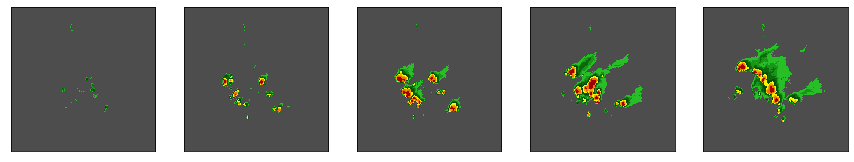

In [8]:
# View some frames
import matplotlib.pyplot as plt
from sevir.display import get_cmap
fig,axs=plt.subplots(1,5,figsize=(15,5))
cmap,norm,vmin,vmax = get_cmap('vil')
for i in [0,10,20,30,40]:
    axs[i//10].imshow( X[0][0,:,:,i],cmap=cmap,norm=norm,vmin=vmin,vmax=vmax)
    axs[i//10].set_xticks([], [])
    axs[i//10].set_yticks([], [])
# if you want US state lines, you need basemap or some other catographic library.  

In [17]:
# Close object
# this is a good idea so you don't leave the HDF file handles open
vil_seq.close()

#### Get multiple data types

In [21]:
# Look at IR satellite, Lightning counts, and Weather Radar (VIL)
# Treat IR + LGHT as the "input", vil and the target
vil_ir_lght_seq = SEVIRSequence(x_img_types=['ir107','lght'],y_img_types=['vil'],batch_size=4)

Opening HDF5 file for reading ir107/2018/SEVIR_IR107_RANDOMEVENTS_2018_0101_0430.h5
Opening HDF5 file for reading ir107/2018/SEVIR_IR107_RANDOMEVENTS_2018_0501_0831.h5
Opening HDF5 file for reading ir107/2018/SEVIR_IR107_RANDOMEVENTS_2018_0901_1231.h5
Opening HDF5 file for reading ir107/2018/SEVIR_IR107_STORMEVENTS_2018_0101_0630.h5
Opening HDF5 file for reading ir107/2018/SEVIR_IR107_STORMEVENTS_2018_0701_1231.h5
Opening HDF5 file for reading ir107/2019/SEVIR_IR107_RANDOMEVENTS_2019_0101_0430.h5
Opening HDF5 file for reading ir107/2019/SEVIR_IR107_RANDOMEVENTS_2019_0501_0831.h5
Opening HDF5 file for reading ir107/2019/SEVIR_IR107_RANDOMEVENTS_2019_0901_1231.h5
Opening HDF5 file for reading ir107/2019/SEVIR_IR107_STORMEVENTS_2019_0101_0630.h5
Opening HDF5 file for reading ir107/2019/SEVIR_IR107_STORMEVENTS_2019_0701_1231.h5
Opening HDF5 file for reading vil/2018/SEVIR_VIL_RANDOMEVENTS_2018_0101_0430.h5
Opening HDF5 file for reading vil/2018/SEVIR_VIL_RANDOMEVENTS_2018_0501_0831.h5
Open

In [26]:
# generate an X,Y pair
X,Y = vil_ir_lght_seq.__getitem__(420)  # X,Y are lists same length as x_img_types and y_img_types

In [27]:
print('X (IR):',X[0].shape)
print('X (LGHT):',X[1].shape)
print('Y (VIL):',Y[0].shape)

X (IR): (4, 192, 192, 49)
X (LGHT): (4, 48, 48, 48)
Y (VIL): (4, 384, 384, 49)


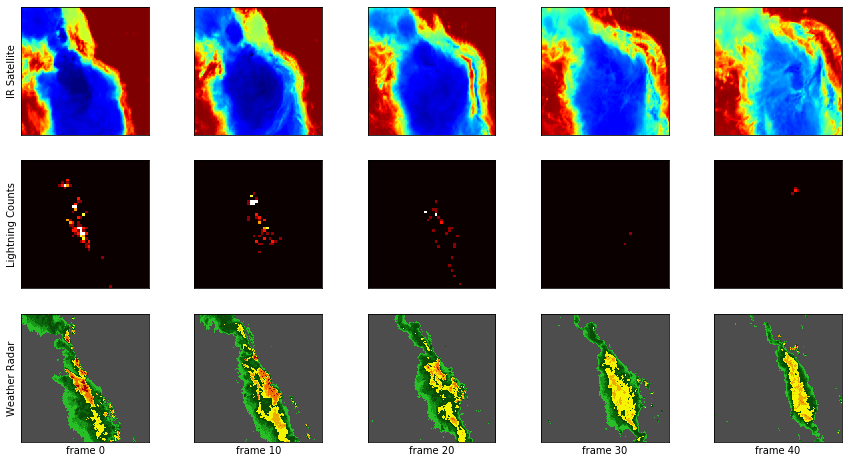

In [28]:
# View these
fig,axs=plt.subplots(3,5,figsize=(15,8))
cmap1,norm1,vmin1,vmax1 = get_cmap('ir107')
cmap2,norm2,vmin2,vmax2 = get_cmap('vil')
for i in [0,10,20,30,40]:
    axs[0][i//10].imshow( X[0][0,:,:,i]/100,cmap=cmap1,norm=norm1,vmin=vmin1,vmax=vmax1)
    axs[0][i//10].set_xticks([], [])
    axs[0][i//10].set_yticks([], [])
    if i==0:axs[0][i//10].set_ylabel('IR Satellite')
        
    axs[1][i//10].imshow( X[1][0,:,:,i],cmap='hot',vmin=0,vmax=5)
    axs[1][i//10].set_xticks([], [])
    axs[1][i//10].set_yticks([], [])
    if i==0:axs[1][i//10].set_ylabel('Lightning Counts')
    
    axs[2][i//10].imshow( Y[0][0,:,:,i],cmap=cmap2,norm=norm2,vmin=vmin2,vmax=vmax2)
    axs[2][i//10].set_xticks([], [])
    axs[2][i//10].set_yticks([], [])
    if i==0:axs[2][i//10].set_ylabel('Weather Radar')
    axs[2][i//10].set_xlabel(f'frame {i}')

In [29]:
vil_ir_lght_seq.close()

#### Get single images (not movies)

In [30]:
# Can also "unwrap" the time dimension if you only want single images
# Because of this, we'll increase batch size and also shuffle so that images in a movie don't appear next
# to each other in the batches
vil_imgs = SEVIRSequence(x_img_types=['vil'],
                         batch_size=256,
                         unwrap_time=True,
                         shuffle=True)

Opening HDF5 file for reading vil/2017/SEVIR_VIL_RANDOMEVENTS_2017_0501_0831.h5
Opening HDF5 file for reading vil/2017/SEVIR_VIL_RANDOMEVENTS_2017_0901_1231.h5
Opening HDF5 file for reading vil/2017/SEVIR_VIL_STORMEVENTS_2017_0101_0630.h5
Opening HDF5 file for reading vil/2017/SEVIR_VIL_STORMEVENTS_2017_0701_1231.h5
Opening HDF5 file for reading vil/2018/SEVIR_VIL_RANDOMEVENTS_2018_0101_0430.h5
Opening HDF5 file for reading vil/2018/SEVIR_VIL_RANDOMEVENTS_2018_0501_0831.h5
Opening HDF5 file for reading vil/2018/SEVIR_VIL_RANDOMEVENTS_2018_0901_1231.h5
Opening HDF5 file for reading vil/2018/SEVIR_VIL_STORMEVENTS_2018_0101_0630.h5
Opening HDF5 file for reading vil/2018/SEVIR_VIL_STORMEVENTS_2018_0701_1231.h5
Opening HDF5 file for reading vil/2019/SEVIR_VIL_RANDOMEVENTS_2019_0101_0430.h5
Opening HDF5 file for reading vil/2019/SEVIR_VIL_RANDOMEVENTS_2019_0501_0831.h5
Opening HDF5 file for reading vil/2019/SEVIR_VIL_RANDOMEVENTS_2019_0901_1231.h5
Opening HDF5 file for reading vil/2019/SEVIR

In [31]:
# Get a batch
X = vil_imgs.__getitem__(1234)  # returns list the same size as x_img_types passed to constructor
X[0].shape # Now there is no time dimension

(256, 384, 384)

In [32]:
vil_imgs.close()

#### Date filters

When doing train/test splits, spliting on date of the event is a natural way partition your data.  This can be done easily in SEVIR by adding some date filters to the constructor

In [33]:
import datetime
# Train on 2018 data, test on 2019 data
vil_img_train = SEVIRSequence(x_img_types=['vil'],batch_size=256,unwrap_time=True,
                              start_date=datetime.datetime(2018,1,1),
                              end_date=datetime.datetime(2019,1,1))
vil_img_test = SEVIRSequence(x_img_types=['vil'],batch_size=256,unwrap_time=True,
                              start_date=datetime.datetime(2019,1,1),
                              end_date=datetime.datetime(2020,1,1))

Opening HDF5 file for reading vil/2018/SEVIR_VIL_RANDOMEVENTS_2018_0101_0430.h5
Opening HDF5 file for reading vil/2018/SEVIR_VIL_RANDOMEVENTS_2018_0501_0831.h5
Opening HDF5 file for reading vil/2018/SEVIR_VIL_RANDOMEVENTS_2018_0901_1231.h5
Opening HDF5 file for reading vil/2018/SEVIR_VIL_STORMEVENTS_2018_0101_0630.h5
Opening HDF5 file for reading vil/2018/SEVIR_VIL_STORMEVENTS_2018_0701_1231.h5
Opening HDF5 file for reading vil/2019/SEVIR_VIL_RANDOMEVENTS_2019_0101_0430.h5
Opening HDF5 file for reading vil/2019/SEVIR_VIL_RANDOMEVENTS_2019_0501_0831.h5
Opening HDF5 file for reading vil/2019/SEVIR_VIL_RANDOMEVENTS_2019_0901_1231.h5
Opening HDF5 file for reading vil/2019/SEVIR_VIL_STORMEVENTS_2019_0101_0630.h5
Opening HDF5 file for reading vil/2019/SEVIR_VIL_STORMEVENTS_2019_0701_1231.h5


In [34]:
del(vil_img_train)
del(vil_img_test)

In [35]:
# The datetime_filter can let you carefully control what times are sampled.
vis_seq = SEVIRSequence(x_img_types=['vis'],batch_size=32,unwrap_time=True,
                              start_date=datetime.datetime(2018,1,1),
                              end_date=datetime.datetime(2019,1,1),
                              datetime_filter=lambda t: np.logical_and(t.dt.hour>=13,t.dt.hour<=21))

Opening HDF5 file for reading vis/2018/SEVIR_VIS_RANDOMEVENTS_2018_0111_0120.h5
Opening HDF5 file for reading vis/2018/SEVIR_VIS_RANDOMEVENTS_2018_0121_0131.h5
Opening HDF5 file for reading vis/2018/SEVIR_VIS_RANDOMEVENTS_2018_0201_0210.h5
Opening HDF5 file for reading vis/2018/SEVIR_VIS_RANDOMEVENTS_2018_0211_0220.h5
Opening HDF5 file for reading vis/2018/SEVIR_VIS_RANDOMEVENTS_2018_0221_0228.h5
Opening HDF5 file for reading vis/2018/SEVIR_VIS_RANDOMEVENTS_2018_0301_0310.h5
Opening HDF5 file for reading vis/2018/SEVIR_VIS_RANDOMEVENTS_2018_0311_0320.h5
Opening HDF5 file for reading vis/2018/SEVIR_VIS_RANDOMEVENTS_2018_0321_0331.h5
Opening HDF5 file for reading vis/2018/SEVIR_VIS_RANDOMEVENTS_2018_0401_0410.h5
Opening HDF5 file for reading vis/2018/SEVIR_VIS_RANDOMEVENTS_2018_0411_0420.h5
Opening HDF5 file for reading vis/2018/SEVIR_VIS_RANDOMEVENTS_2018_0421_0430.h5
Opening HDF5 file for reading vis/2018/SEVIR_VIS_RANDOMEVENTS_2018_0501_0510.h5
Opening HDF5 file for reading vis/2018/S

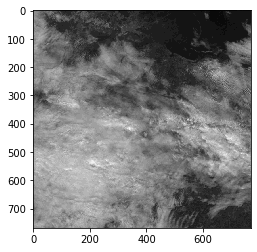

In [36]:
# images should all have day light for VIS satellite
X=vis_seq.__getitem__(123)
cmap,norm,vmin,vmax = get_cmap('vis')
plt.imshow(X[0][0,:,:]/10000,cmap=cmap,norm=norm,vmin=vmin,vmax=vmax)

In [59]:
vis_seq.close()

# Using SEVIR in model training

In [ ]:
# To use SEVIR in model training its

# Set up the generators 
training_generator = SEVIRSequence(...)
validation_generator = SEVIRSequence(...)

#... make your model

# Train/validate
model.fit_generator(generator=training_generator,
                    validation_data=validation_generator,
                    use_multiprocessing=True, 
                    workers=6)




#  Optimizing your Input pipeline